In [34]:
import pandas as pd
import numpy as np


In [35]:
import skimage
from skimage.filters import try_all_threshold

In [69]:
from PIL import Image
from skimage import io
image = io.imread('/opt/ml/detection/dataset/112.jpg')

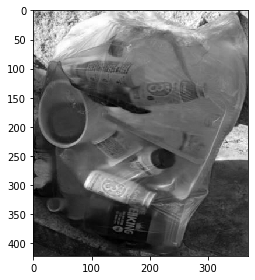

In [70]:
io.imshow(image[:, :, 0])

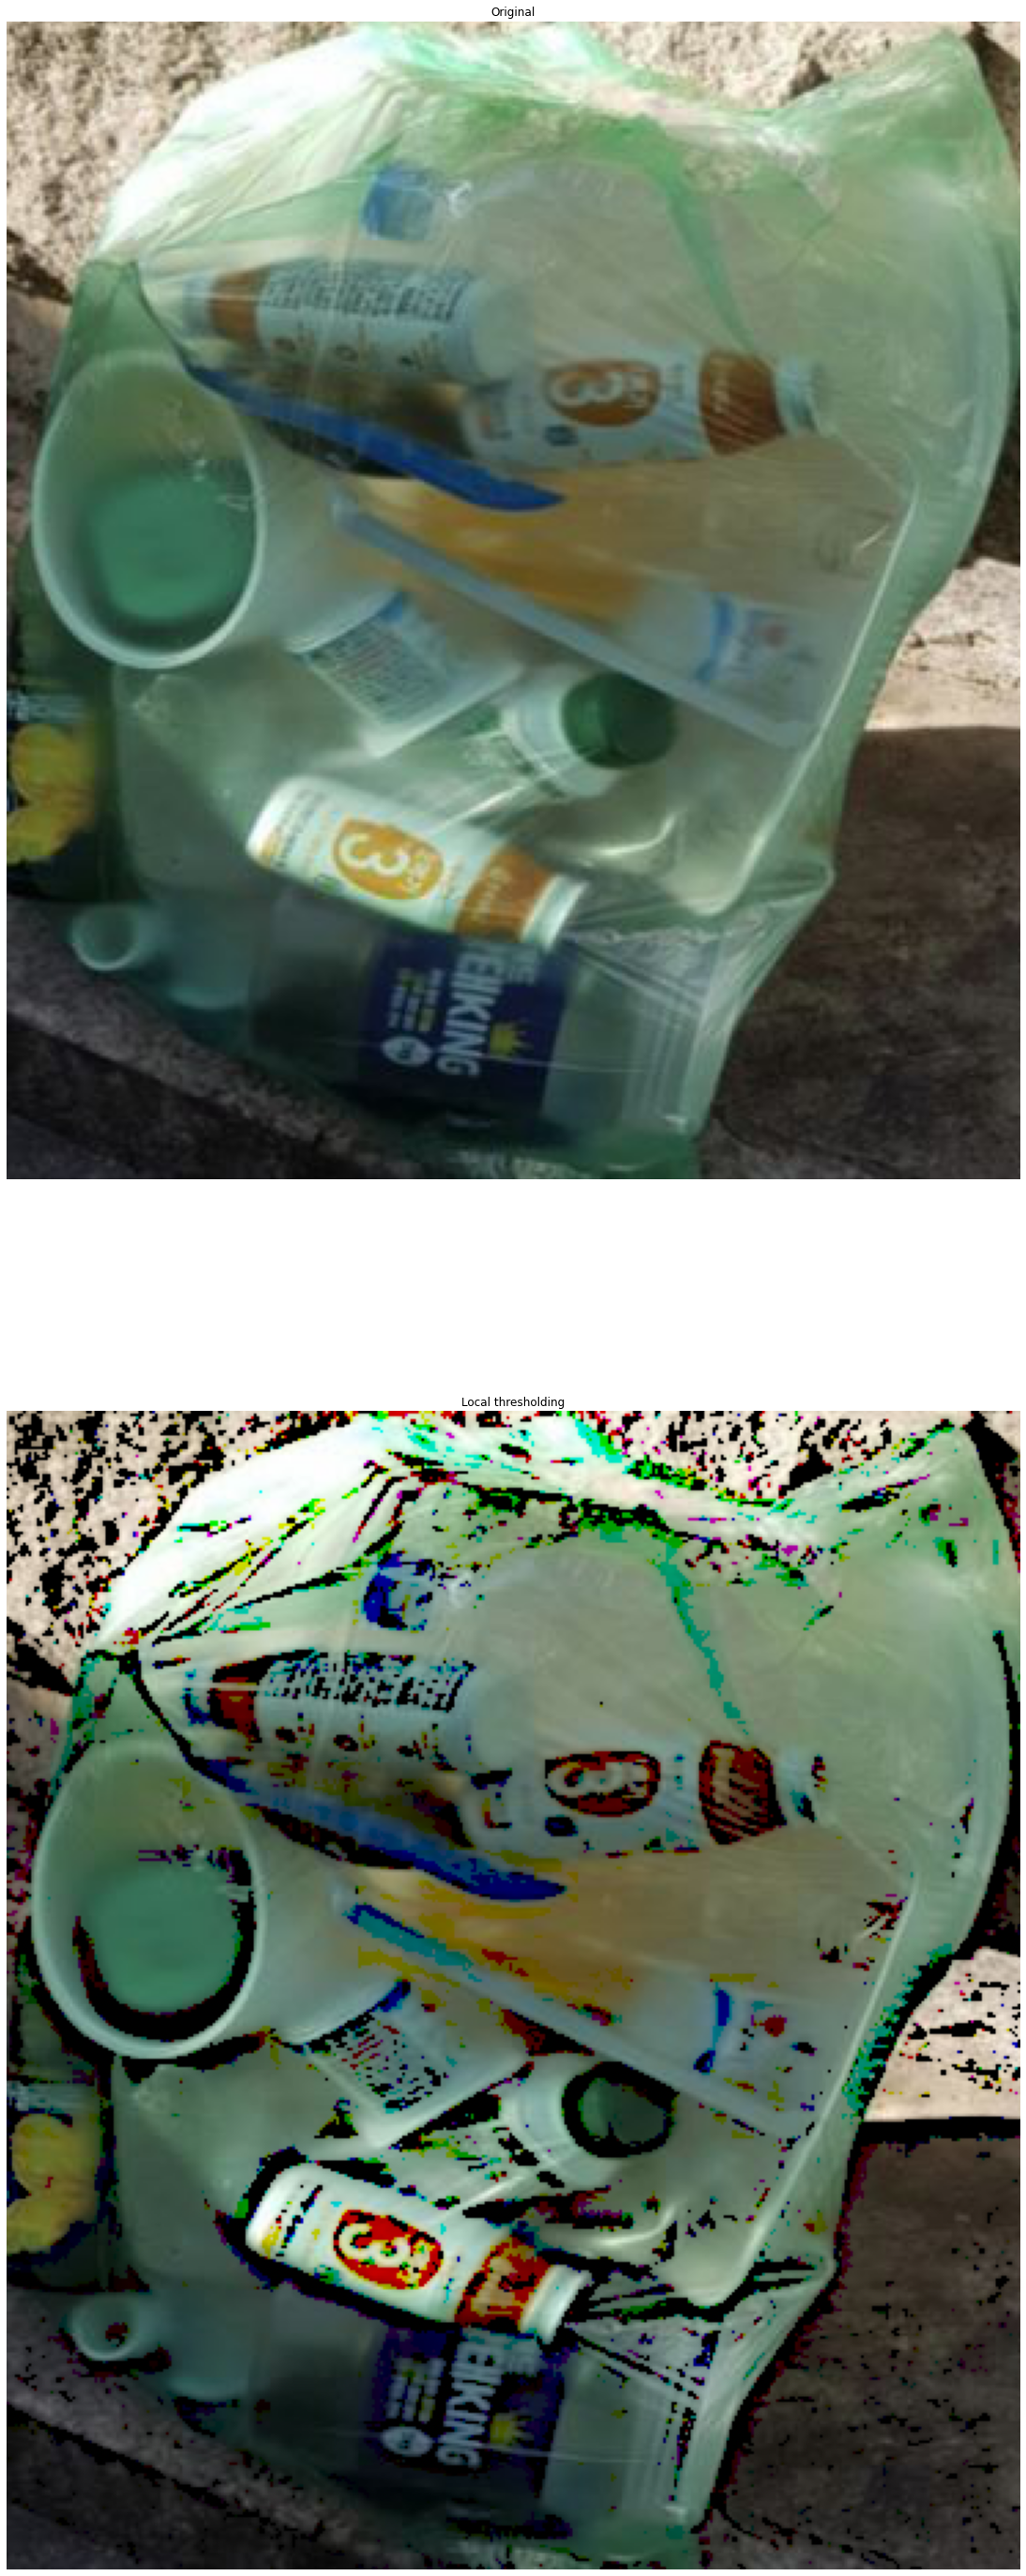

In [88]:
from skimage.filters import threshold_otsu, threshold_local
imgs = []
for i in range(3):
    image_b = image[:, :, i]
    global_thresh = threshold_otsu(image_b)
    binary_global = image_b > global_thresh

    block_size = 35
    local_thresh = threshold_local(image_b, block_size, offset=10)
    binary_local = image_b > local_thresh

#     fig, axes = plt.subplots(nrows=3, figsize=(20, 50))
#     ax = axes.ravel()
#     plt.gray()

#     ax[0].imshow(image)
#     ax[0].set_title('Original')

#     ax[1].imshow(binary_global)
#     ax[1].set_title('Global thresholding')

#     ax[2].imshow(binary_local)
#     ax[2].set_title('Local thresholding')

#     for a in ax:
#         a.axis('off')
#     plt.show()
    
    imgs.append(binary_local)
   

import numpy as np

binary_layer = np.stack((imgs[0], imgs[1], imgs[2]), axis = 0)
binary_layer = np.transpose(binary_layer, (1, 2, 0))
# binary_layer = np.logical_not(binary_layer)

fig, axes = plt.subplots(nrows=2, figsize=(20, 50))
ax = axes.ravel()

ax[0].imshow(image)
ax[0].set_title('Original')

ax[1].imshow(binary_layer * image)
ax[1].set_title('Local thresholding')

for a in ax:
    a.axis('off')
    
plt.show()

In [57]:
image.shape

(278, 481, 3)